# 군집분석(Clustering)
* 개체들을 분류(classification)하기 위한 기준이 없는 상태에서 주어진 데이터의 속성값들을 고려해 유사한 개체끼리 그룹(클러스터)화하는 방법(비지도 학습)
* 그룹내 차이는 줄이고 그룹간 차이는 최대화 하도록 하여 대표성을 찾는 원리로 구현되는 것이 일반적

#### 계층적 군집분석(Hierarchical Clustering) 
* Dendrogram

#### 비계층적 군집분석(Non-Hierarchical Clustering)
* 중심 기반(Center-based): K-means
* 밀도 기반(Density-based): DBSCAN
    


# DBSCAN
#### DBSCAN의 개념
* Density-based spatial clustering of applications with noise
* "밀도기반?" => 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식

#### DBSCAN의 원리
* K-Means와는 달리 군집의 개수 k를 미리 정할 필요가 없음
* 정의할 변수 
    * epsilon: 기준점으로부터의 거리(반지름)
    * minPts: 해당 반경내의 점의 수
---
* minPts = 4
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fc9Noli%2FbtrzOHlot66%2Fl8GtUBy7Sj3kqFQ2Cfx151%2Fimg.png" width = 500>

> P반경 내 5개의 점이 있기 때문에 군집으로 판단하여 P는 core point가 됨

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FcfiSH4%2FbtrzQgASHzV%2FqkTK0aYi6malW1aFCgkCm0%2Fimg.png" width = 500>

> 회색점 P2는 반경내의 점이 3개로, minPts에 미치지 못하기 때문에 core point는 되지 못함. 하지만 앞의 점 P를 core point로 하는 군집에는 속하기 때문에 P2는 border point(경계점)가 됨

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fb3QfBn%2FbtrzKRpegwe%2FZCCA25jvyIDtiD58pYZ5ak%2Fimg.png" width = 500>

> P3는 epsilon 반경내에 점 4개를 가지고 있기 때문에 core point가 됨

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FEiQjB%2FbtrzPhmtFfN%2F9k2Vw1JzWUmiLGNXsptaU0%2Fimg.png" width = 500>

> P3를 중심으로 하는 반경내에 다른 core point인 P가 포함되어 있는데, 이 경우 core point P와 P3는 연결되어 있다고하고 하나의 군집으로 묶이게 됨

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FkXMQZ%2FbtrzPgVsp2x%2Fi0CYt117YXdIUKJVzePKtK%2Fimg.png" width = 500>

> P4는 어떤 점을 중심으로 해도 mitPts = 4를 만족하는 범위에 포함되지 않는다. 즉, 어느 군집에도 속하지 않는 outlier가 되는데, 이를 noise point라고 함


<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fdp8Bxa%2FbtrzKnBjJ8S%2FzYq5Mqwgta9mMPmTbdbmpk%2Fimg.png" width = 500>

> 점을 중심으로 epsilon 반경내에 minPts 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 함  
> 군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고. 주로 클러스터의 외곽을 이루는 점이 됨 
> 어느 클러스터에도 속하지 않는 점을 noise point라고 함

#### K-means와의 비교 
* K-means
    * 군집의 수(k)를 미리 결정
    * 중심점(Centroid) 갱신을 통해 비용함수 최적화
    * 이상치에 영향을 많이 받음
* DBSCAN
    * 반경(eps), 최소 개체 수(minPts)를 미리 결정
    * 자동적으로 군집의 수 결정
    * 군집 간 개체들이 섞이지 않음
    * 노이즈 개념으로 이상치 검출 가능

# 코드

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import *
from sklearn.cluster import * 
import mglearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils._testing import ignore_warnings
import matplotlib
import warnings

In [308]:
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

warnings.filterwarnings(action = 'ignore')

# Parameter 조정에 따른 군집의 변화

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


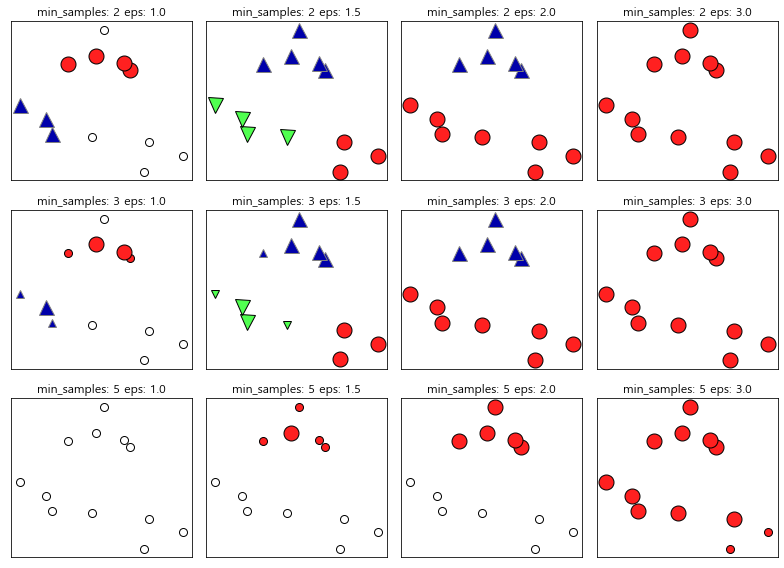

In [309]:
mglearn.plots.plot_dbscan()

* eps
    * 너무 클 경우: 클러스터가 단 하나로 만들어짐 
    * 너무 작을 경우: 어떤 포인트도 core point가 되지 않아 잡음이 많아짐
* min_samples
    * 너무 클 경우: core point가 줄어들고 잡음 포인트가 많아짐
    * 너무 작을 경우: 클러스터의 수가 너무 많아질 수 있음
    
적절한 paramer를 찾는것이 중요

# 어떤 Clustering 알고리즘을 사용해야할까?

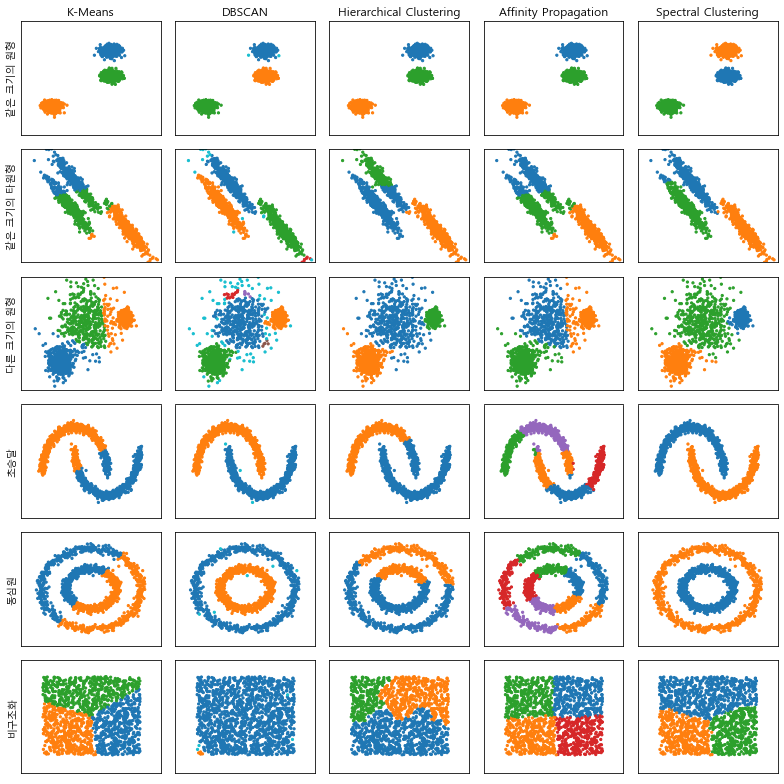

In [310]:
np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "같은 크기의 원형": blobs, 
    "같은 크기의 타원형": anisotropic, 
    "다른 크기의 원형": varied, 
    "초승달": noisy_moons, 
    "동심원": noisy_circles, 
    "비구조화": no_structure
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    if data_name in ["초승달", "동심원"]:
        n_clusters = 2
    else:
        n_clusters = 3

    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=n_clusters)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=n_clusters)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        ('Spectral Clustering', spectral),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

#### 데이터의 분포, 특성, 군집화 알고리즘별로 군집화의 형태가 달라진다.
* 데이터의 분포에 따라 많이 사용되는 알고리즘을 선택
* 군집평가지표에 따른 알고리즘을 선택

# 군집평가지표

#### 타겟이 있는 경우
* ARI(Adjusted Rand Index)
    * 실제 라벨 집단과 클러스터링으로 예측한 라벨 집단을 비교 
    * 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 의미함

#### 타겟이 없는 경우
* Silhouette Coefficient
    * ai: i와 같은 군집에 속한 원소들의 평균 거리 
    * bi: i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
    * -1부터 1까지의 값을 가지고 1이 가장 좋은 성능을 의미함
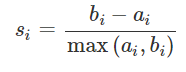


# DBSCAN vs K-Means

#### 초승달 형태

In [311]:
x, y = make_moons(n_samples = 300, noise = 0.05, random_state = 42)

In [312]:
df = pd.DataFrame({
    'x1': x[:, 0],
    'x2': x[:, 1],
    'y': y
})
df

,x1,x2,y
0,0.622519,-0.372101,1
1,1.904269,-0.136303,1
2,-0.069431,0.456117,1
3,0.933899,0.237483,0
4,1.180360,-0.490847,1
...,...,...,...
295,0.344998,-0.187267,1
296,0.138042,1.050389,0
297,-0.639087,0.819081,0
298,1.742488,-0.076951,1


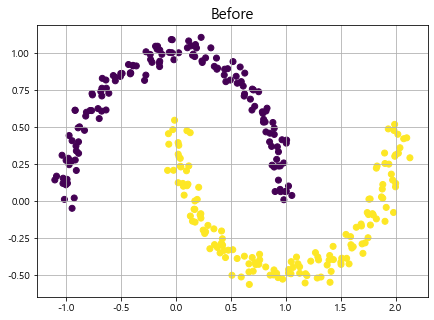

In [313]:
plt.figure(figsize  = (7, 5))
plt.title('Before', fontsize = 15)
plt.scatter(df['x1'], df['x2'], marker = 'o', c = df['y'])
plt.grid()
plt.show()

## K-means

In [314]:
from sklearn.metrics.cluster import adjusted_rand_score

In [315]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(df[['x1', 'x2']])
df['cluster_km'] = kmeans.labels_

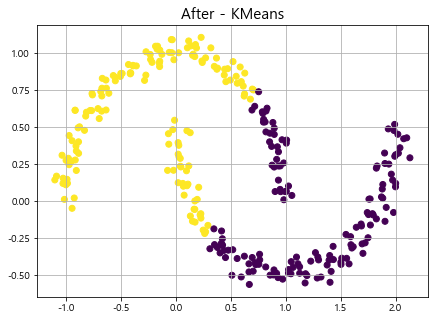

ARI: 0.24748333370867506


In [316]:
plt.figure(figsize = (7, 5))
plt.title('After - KMeans', fontsize = 15)
plt.scatter(df['x1'], df['x2'], c = df['cluster_km'])
plt.grid()
plt.show()

ari_km = adjusted_rand_score(df['y'], df['cluster_km'])
print(f'ARI: {ari_km}')

## DBSCAN 

In [317]:
db_scan = DBSCAN().fit(df[['x1', 'x2']]) # eps = 0.5, min_samples = 5
df['cluster_db'] = db_scan.labels_

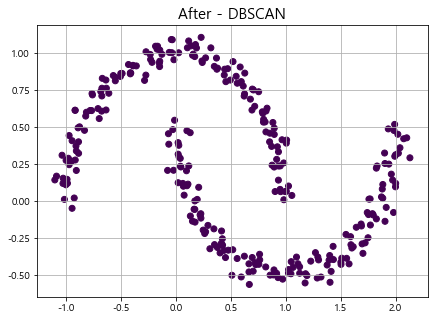

ARI: 0.0


In [318]:
plt.figure(figsize = (7, 5))
plt.title('After - DBSCAN', fontsize = 15)
plt.scatter(df['x1'], df['x2'], c = df['cluster_db'])
plt.grid()
plt.show()

ari_db = adjusted_rand_score(df['y'], df['cluster_db'])
print(f'ARI: {ari_db}')

#### parameter 조정

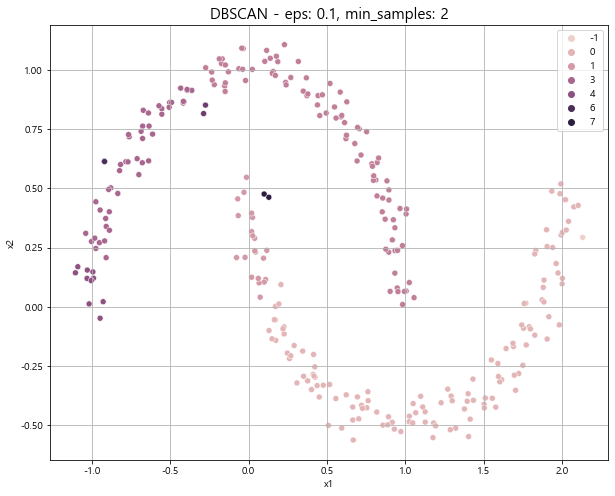

Number of clusters: 9
ARI: 0.59


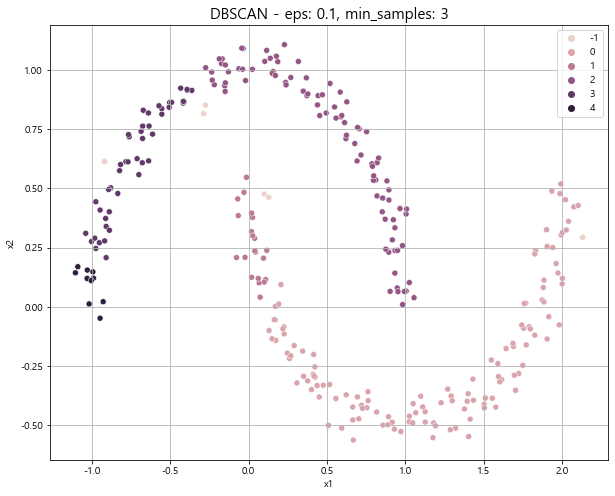

Number of clusters: 6
ARI: 0.59


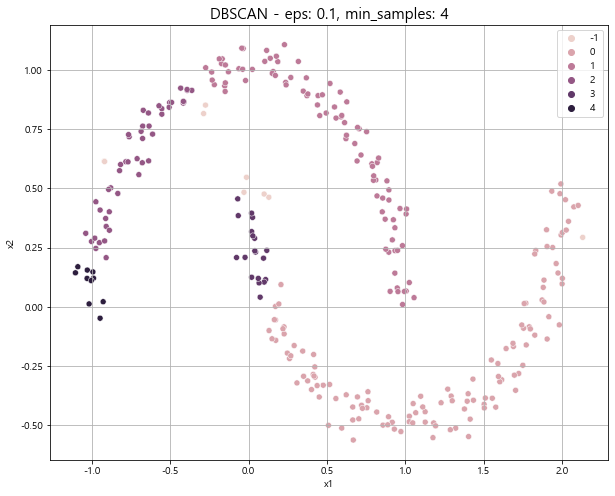

Number of clusters: 6
ARI: 0.59


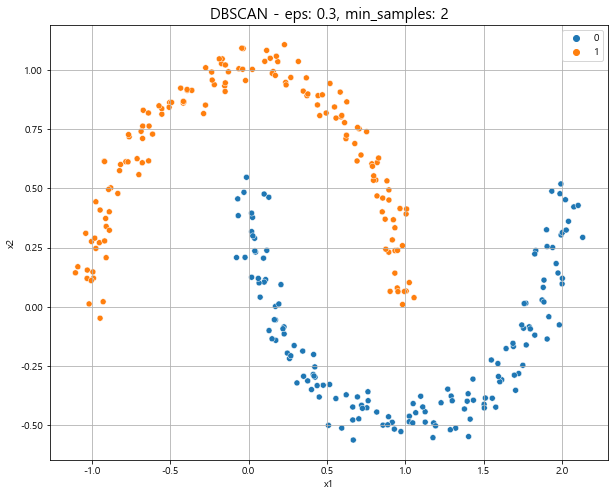

Number of clusters: 2
ARI: 1.0


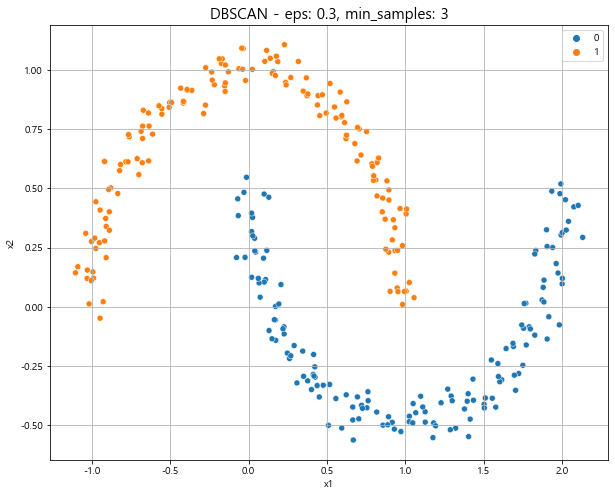

Number of clusters: 2
ARI: 1.0


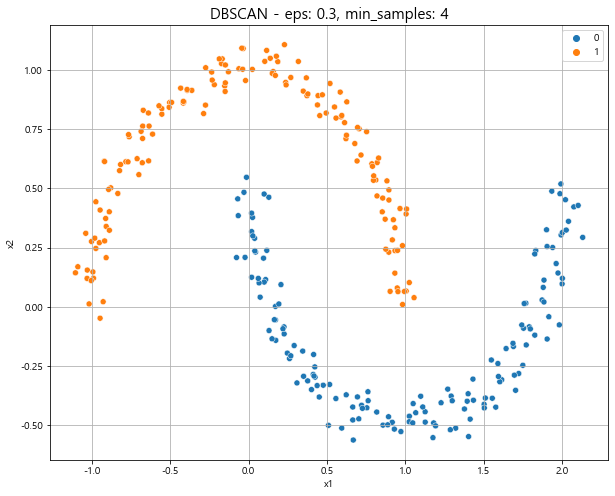

Number of clusters: 2
ARI: 1.0


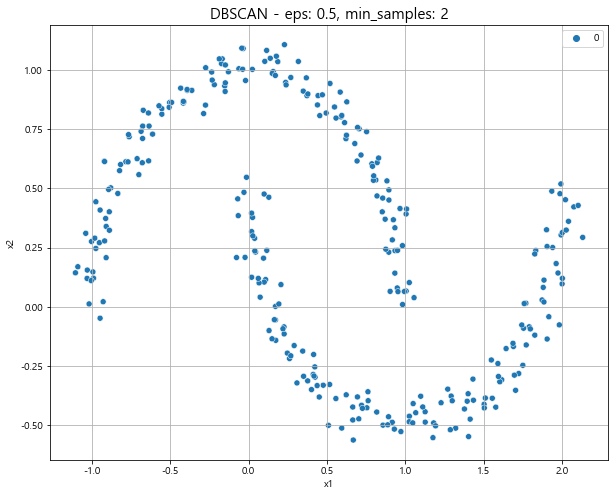

Number of clusters: 1
ARI: 0.0


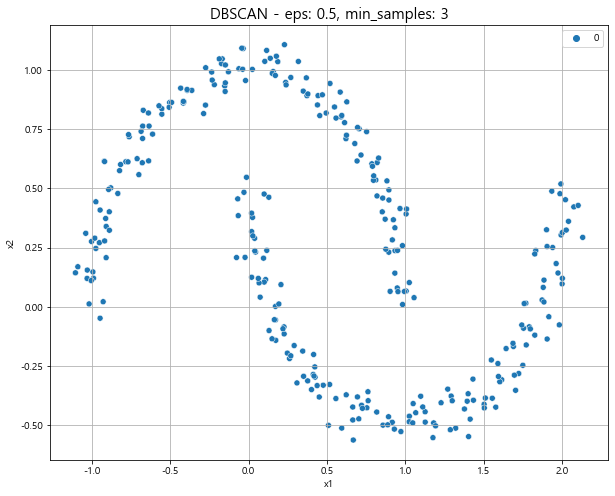

Number of clusters: 1
ARI: 0.0


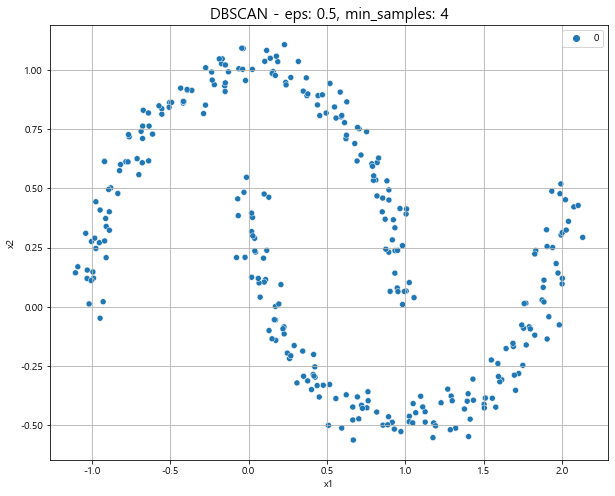

Number of clusters: 1
ARI: 0.0
----------------------------------------------------------------------------------------------------
Best ARI: 1.0
Best Params: (0.30000000000000004, 2)


In [319]:
eps_list = np.arange(0.1, 0.6, 0.2)
n_min_list = np.arange(2, 5)
DBSCAN_params = list(product(eps_list, n_min_list))
best_score = -1
best_ari = -1

for p in DBSCAN_params:
    # Scatter plot
    db_scan = DBSCAN(eps = p[0], min_samples = p[1]).fit(df[['x1', 'x2']])
    plt.figure(figsize = (10, 8))
    plt.title(f'DBSCAN - eps: {round(p[0], 1)}, min_samples: {p[1]}', fontsize = 15)
    sns.scatterplot(x = 'x1', y = 'x2', data = df, hue = db_scan.labels_)
    plt.legend()
    plt.grid()
    plt.show()
    
    # ARI
    ari = adjusted_rand_score(df['y'], db_scan.labels_)
    if ari > best_ari:
        best_ari = ari
        best_params = p
    
    print(f"Number of clusters: {len(np.unique(db_scan.labels_))}")
    print(f'ARI: {round(adjusted_rand_score(df["y"], db_scan.labels_), 2)}')
    
print('-' * 100)
print(f'Best ARI: {best_ari}')
print(f'Best Params: {best_params}')

#### 결과

* ARI: 
    * DBSCAN: 1.0
    * K-Means: 0.24748333370867506
    
#### 해당 데이터는 DBSCAN 알고리즘으로 군집화 했을 때 성능이 더 좋다고 판단

## Wine dataset

In [320]:
from sklearn.datasets import load_wine

In [321]:
wine = load_wine()

In [322]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [323]:
data = wine.data
target = wine.target
target_names = wine.target_names
feature_names = wine.feature_names

In [361]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [364]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [362]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [324]:
df = pd.DataFrame(data, columns = feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [325]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Scaling

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
scaler = StandardScaler()
df.loc[:,:] = scaler.fit_transform(df)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


#### PCA

In [328]:
from sklearn.decomposition import PCA

In [329]:
pca = PCA(n_components = 2)

In [330]:
df = pca.fit_transform(df)

In [331]:
df = pd.DataFrame(df, columns = ['feature_1', 'feature_2'])
df

,feature_1,feature_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [332]:
# 결과 비교를 위한 DataFrame
df2 = df.copy()
df2['target'] = target

#### K-Means

In [333]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [334]:
df['cluster_km'] = kmeans.labels_
df

,feature_1,feature_2,cluster_km
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


In [335]:
df.cluster_km.value_counts()

2    65
1    64
0    49
Name: cluster_km, dtype: int64

In [336]:
import seaborn as sns

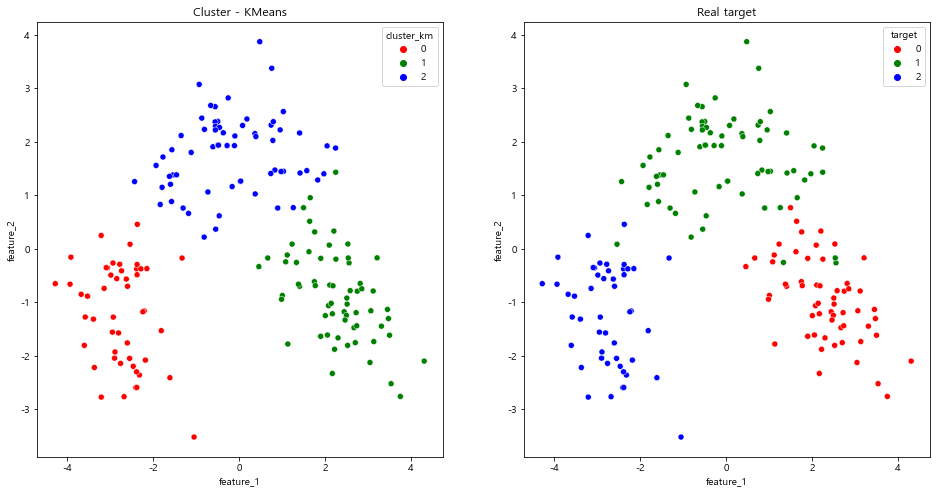

In [337]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df, hue = 'cluster_km', ax = ax[0], palette = ['red', 'green', 'blue'])
ax[0].set_title('Cluster - KMeans')

sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df2, hue = 'target', ax = ax[1], palette = ['red', 'green', 'blue'])
ax[1].set_title('Real target')
plt.show()

In [338]:
ari_km = adjusted_rand_score(df2['target'], df['cluster_km'])
print(f'ARI: {ari_km}')

ARI: 0.8950582389649661


#### DBSCAN

In [343]:
from itertools import product
from sklearn.metrics import silhouette_score

eps_list = np.arange(0.1, 5, 0.5)
n_min_list = np.arange(2, 5)
DBSCAN_params = list(product(eps_list, n_min_list))
best_ari = 0 

for p in DBSCAN_params:
    db_scan = DBSCAN(eps = p[0], min_samples = p[1]).fit(df)
    
    # ARI
    ari = adjusted_rand_score(df2['target'], db_scan.labels_)
    if ari >= best_ari:
        best_ari = ari
        best_params = p
        best_labels = db_scan.labels_
    
    print(f"Number of clusters: {len(np.unique(db_scan.labels_))}")
    print(f'ARI: {round(adjusted_rand_score(df2["target"], db_scan.labels_), 2)}')
    
print('-' * 100)
print(f'Best ARI: {best_ari}')
print(f'Best Params: {best_params}')

Number of clusters: 22
ARI: -0.0
Number of clusters: 5
ARI: -0.0
Number of clusters: 2
ARI: -0.01
Number of clusters: 6
ARI: 0.82
Number of clusters: 4
ARI: 0.82
Number of clusters: 4
ARI: 0.81
Number of clusters: 6
ARI: 0.82
Number of clusters: 4
ARI: 0.82
Number of clusters: 4
ARI: 0.82
Number of clusters: 5
ARI: 0.88
Number of clusters: 4
ARI: 0.88
Number of clusters: 4
ARI: 0.88
Number of clusters: 5
ARI: 0.88
Number of clusters: 4
ARI: 0.88
Number of clusters: 4
ARI: 0.88
Number of clusters: 2
ARI: 0.44
Number of clusters: 2
ARI: 0.44
Number of clusters: 3
ARI: 0.45
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
Number of clusters: 1
ARI: 0.0
--------------------------------------------------

In [344]:
df['cluster_db'] = best_labels

In [345]:
df['cluster_db'].unique()

array([ 0,  1,  2, -1], dtype=int64)

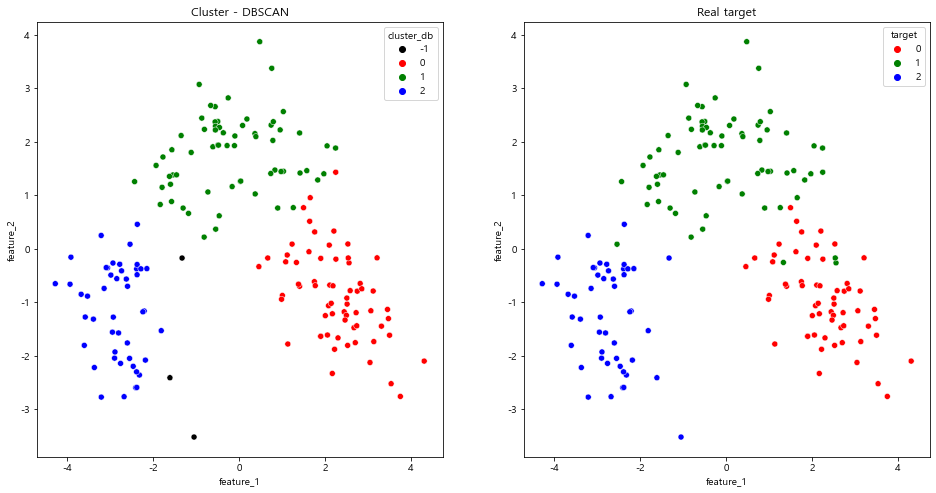

In [346]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df, hue = 'cluster_db', ax = ax[0], palette = ['black', 'red', 'green', 'blue' ])
ax[0].set_title('Cluster - DBSCAN')

sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df2, hue = 'target', ax = ax[1], palette = ['red', 'green', 'blue'])
ax[1].set_title('Real target')
plt.show()

#### Silhouette Score

In [347]:
sil_km = silhouette_score(df.values, df['cluster_km'], metric = 'euclidean')
sil_km

0.6058911328090226

In [348]:
sil_db = silhouette_score(df.values, df['cluster_db'], metric = 'euclidean')
sil_db

0.598057596953163

#### 결과

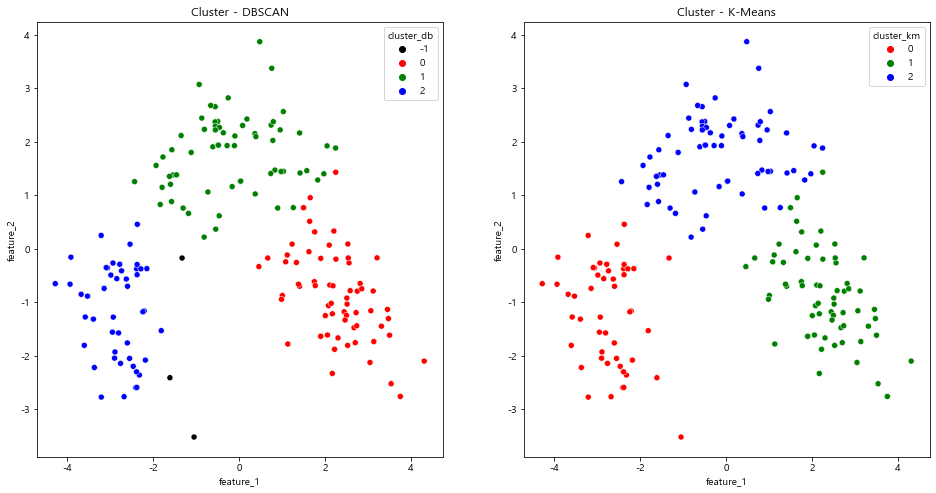

In [349]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df, hue = 'cluster_db', ax = ax[0], palette = ['black', 'red', 'green', 'blue' ])
ax[0].set_title('Cluster - DBSCAN')

sns.scatterplot(x = 'feature_1', y = 'feature_2', data = df, hue = 'cluster_km', ax = ax[1], palette = ['red', 'green', 'blue'])
ax[1].set_title('Cluster - K-Means')
plt.show()

#### ARI
* DBSCAN: 0.8754964228015611
* K-Means: 0.8950582389649661

#### Silhouette Score:
* DBSCAN: 0.554600760666446
* K-Means: 0.6009727097254566

#### 해당 데이터는 K-means 알고리즘으로 군집화 했을 때 성능이 더 좋다고 판단

## Mall customer

In [350]:
df = pd.read_csv('./data/customer/Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [351]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Gender'].values)
df['Gender'] = integer_encoded
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [352]:
df.drop('CustomerID', axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


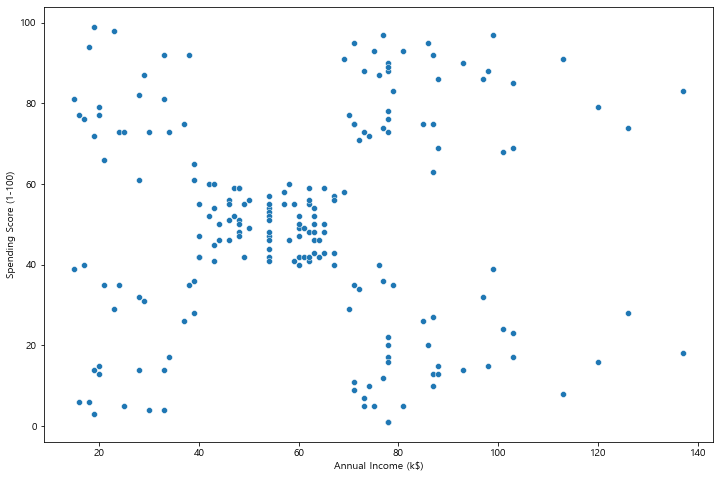

In [353]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.show()

#### K-Means

In [354]:
k_list = np.arange(2, 5)
best_sil_km = 0

for k in k_list:
    k_means = KMeans(n_clusters = k, random_state = 42)
    k_means.fit(df)
    sil_score = silhouette_score(df, k_means.labels_)
    if sil_score > best_sil_km:
        best_sil_km = sil_score
        best_k = k
        best_labels_km = k_means.labels_

#### DBSCAN

In [355]:
eps = np.arange(1, 10, 0.5)
n_samples = np.arange(2, 5)
dbscan_params = list(product(eps, n_samples))
best_sil_db = -1

for p in dbscan_params:
    dbscan = DBSCAN(eps = p[0], min_samples = p[1])
    dbscan.fit(df)
    if len(np.unique(dbscan.labels_)) > 2:
        sil_score_db = silhouette_score(df, dbscan.labels_)
        #best_labels_db = dbscan.labels_
        if sil_score_db > best_sil_db:
            best_sil_db = sil_score_db
            best_labels_db = dbscan.labels_

In [356]:
df['cluster_km'] = best_labels_km
df['cluster_db'] = best_labels_db
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_km,cluster_db
0,1,19,15,39,2,-1
1,1,21,15,81,2,0
2,0,20,16,6,1,-1
3,0,23,16,77,2,0
4,0,31,17,40,1,1
...,...,...,...,...,...,...
195,0,35,120,79,3,18
196,0,45,126,28,0,-1
197,1,32,126,74,3,18
198,1,32,137,18,0,-1


In [357]:
c_palette = sns.color_palette('Set1')
c_palette

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [358]:
len(df['cluster_db'].unique())

20

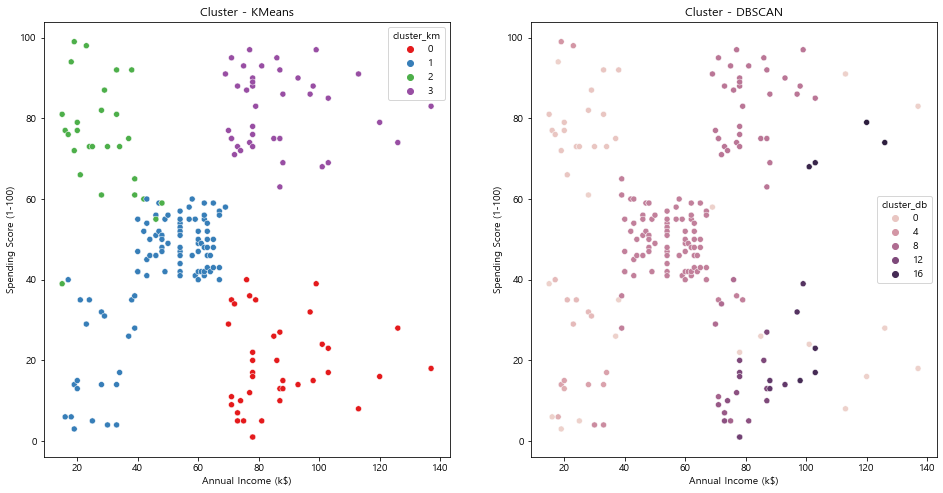

In [359]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'cluster_km', ax = ax[0], palette = c_palette[: len(df['cluster_km'].unique())])
ax[0].set_title("Cluster - KMeans")

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'cluster_db', ax = ax[1])
ax[1].set_title("Cluster - DBSCAN")

plt.show()

In [360]:
print("Silhouette Score")
print(f'DBSCAN: {best_sil_db}')
print(f'K-Means: {best_sil_km}')

Silhouette Score
DBSCAN: 0.17241043945703802
K-Means: 0.4052954330641215


#### 결과
#### 해당 데이터는 K-means 알고리즘으로 군집화 했을 때 성능이 더 좋다고 판단

# DBSCAN의 장단점 
#### 장점 
* noise point검출을 통해 이상치를 구별해내기가 유용하다. 
* 고밀도 데이터를 클러스터링 하는데 유용하다.
* 클러스터의 수를 미리 지정할 필요가 없다.
* 데이터의 분포가 특정 형태를 띌 때 유용한다.

#### 단점
* 부분적으로 비슷한 밀도를 가지거나 밀도가 거의 없는 데이터셋의 경우 연약하다.
* 데이터의 차원이 높아질수록 eps 매개변수의 값을 지정하기 어려워진다.